<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Умножение матриц</a></span></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Алгоритм преобразования</a></span></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка алгоритма</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Защита персональных данных клиентов

Вам нужно защитить данные клиентов страховой компании «Хоть потоп». Разработайте такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обоснуйте корректность его работы.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

**Наша задача:**
1.	Загрузить и изучить данные.
2.	Ответить на вопрос и обосновать решение. 
Признаки умножают на обратимую матрицу. Изменится ли качество линейной регрессии? (Её можно обучить заново.)
a. Изменится. Приведите примеры матриц.
b. Не изменится. Укажите, как связаны параметры линейной регрессии в исходной задаче и в преобразованной.
3.	Предложить алгоритм преобразования данных для решения задачи. Обосновать, почему качество линейной регрессии не поменяется.
4.	Запрограммировать этот алгоритм, применив матричные операции. Проверить, что качество линейной регрессии из sklearn не отличается до и после преобразования. Применить метрику R2.

**Наш план:**
1.	Загрузим и изучим данные.
2.	Ответим на вопрос и обоснуем решение. 
Признаки умножают на обратимую матрицу. Изменится ли качество линейной регрессии? (Её можно обучить заново.)
a. Изменится. Приведите примеры матриц.
b. Не изменится. Укажите, как связаны параметры линейной регрессии в исходной задаче и в преобразованной.
3.	Предложим алгоритм преобразования данных для решения задачи. Обоснуем, почему качество линейной регрессии не поменяется.
4.	Запрограммируем этот алгоритм, применив матричные операции. Проверим, что качество линейной регрессии из sklearn не отличается до и после преобразования. Применим метрику R2.

In [1]:
# ячейка для импорта библиотек
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

## Загрузка данных

In [2]:
# загружаем данные и проводим их первичный осмотр
data_clients = pd.read_csv(r'https://code.s3.yandex.net/datasets/insurance.csv')
display(data_clients.head(10))

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0
5,1,43.0,41000.0,2,1
6,1,39.0,39700.0,2,0
7,1,25.0,38600.0,4,0
8,1,36.0,49700.0,1,0
9,1,32.0,51700.0,1,0


Первично: мы имеем столбец пол преобразованный по технологии Ordinal Encoding (Поряковое кодирование), Возраст в виде вещественного числа, хотя и кажется, что это должно быть целым числом, Столбец Зарплата с суммой в виде вещественных чисел, хотя, похоже округлённой до сотен рублей, Количество членов семьи у клиентов и факт наступления страхового случая - по выплате есть/нет.

Но сначала проверим пропуски в столбцах.

In [3]:
# Изучаем данные на предмет пропусков
data_clients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


Пропусков в наших данных нет. Можно проверить строки на наличие дубликатов и если их нет - то проверить распределение данных и построить графики распределения. Затем делить данные на признаки и цель. 

In [4]:
# приводим типы данных к желаемым
data_clients['Пол'] = data_clients['Пол'].astype('uint32')
data_clients['Зарплата'] = data_clients['Зарплата'].astype('uint64')
data_clients['Возраст'] = data_clients['Возраст'].astype('uint32')
data_clients['Члены семьи'] = data_clients['Члены семьи'].astype('uint32')
data_clients['Страховые выплаты'] = data_clients['Страховые выплаты'].astype('uint32')

# Проверяем успешность замены типов данных
data_clients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Пол                5000 non-null   uint32
 1   Возраст            5000 non-null   uint32
 2   Зарплата           5000 non-null   uint64
 3   Члены семьи        5000 non-null   uint32
 4   Страховые выплаты  5000 non-null   uint32
dtypes: uint32(4), uint64(1)
memory usage: 117.3 KB


In [5]:
# проверяем данные на дубликаты (явные), а вот неявных здесь нет.
print(data_clients.duplicated().sum())

153


Неожиданно много дубликатов (немногим более 3%) - надо удалять.

In [6]:
# удаляем дубликаты
data_clients.drop_duplicates(inplace=True, ignore_index=True)
# проверяем эффективность удаления
print(data_clients.duplicated().sum())

0


Удалили дубликаты. Теперь смотрим на распределения и зависимость цели от признаков, а далее дисбаланс классов.

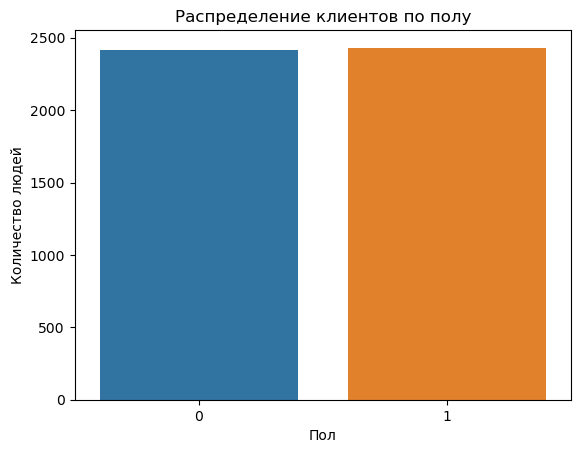

In [7]:
# строим график распределения клиентов по полу
ax = sns.barplot(x=data_clients.Пол, y=data_clients.groupby('Пол').Пол.count())
ax.set(title='Распределение клиентов по полу', xlabel='Пол', ylabel='Количество людей');

Хорошо. Мужчин и женщин практически поровну. 

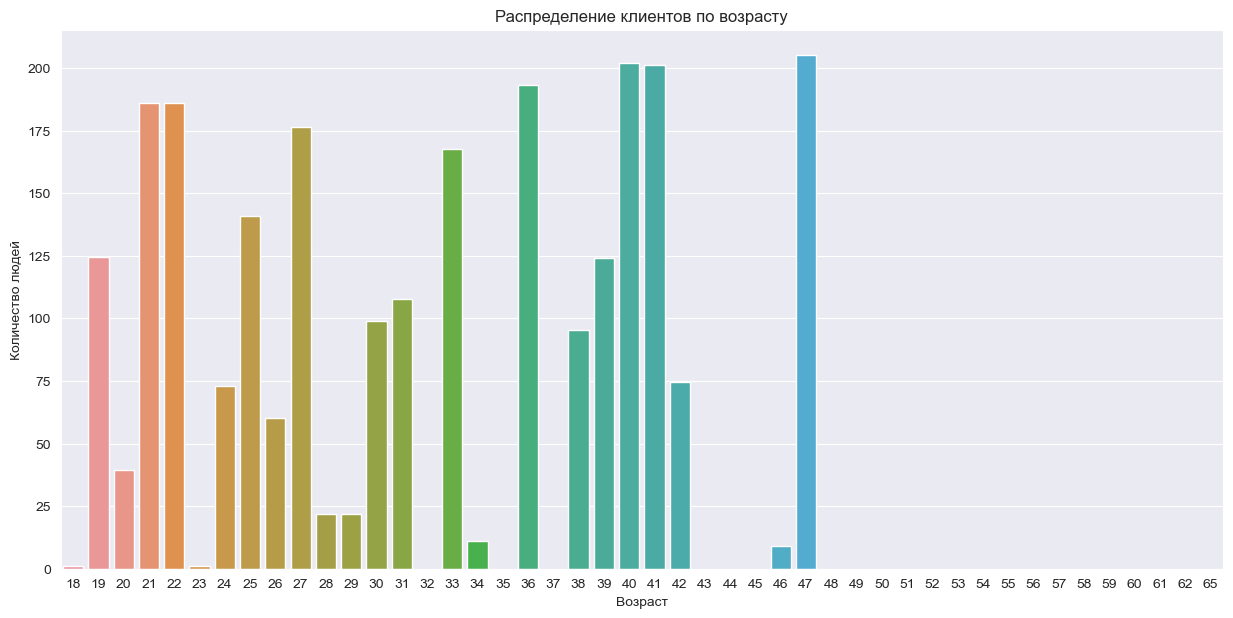

In [8]:
# строим график распределения клиентов по возрасту
sns.set({'figure.figsize': (15, 7)})
ax = sns.barplot(x=data_clients.Возраст, y=data_clients.groupby('Возраст').Возраст.count(), errorbar=None)
ax.set(title='Распределение клиентов по возрасту', xlabel='Возраст', ylabel='Количество людей');

У нас есть клиенты от 18 до 65 лет, но в основном клиенты от 19 до 47 лет - старше крайне редко.

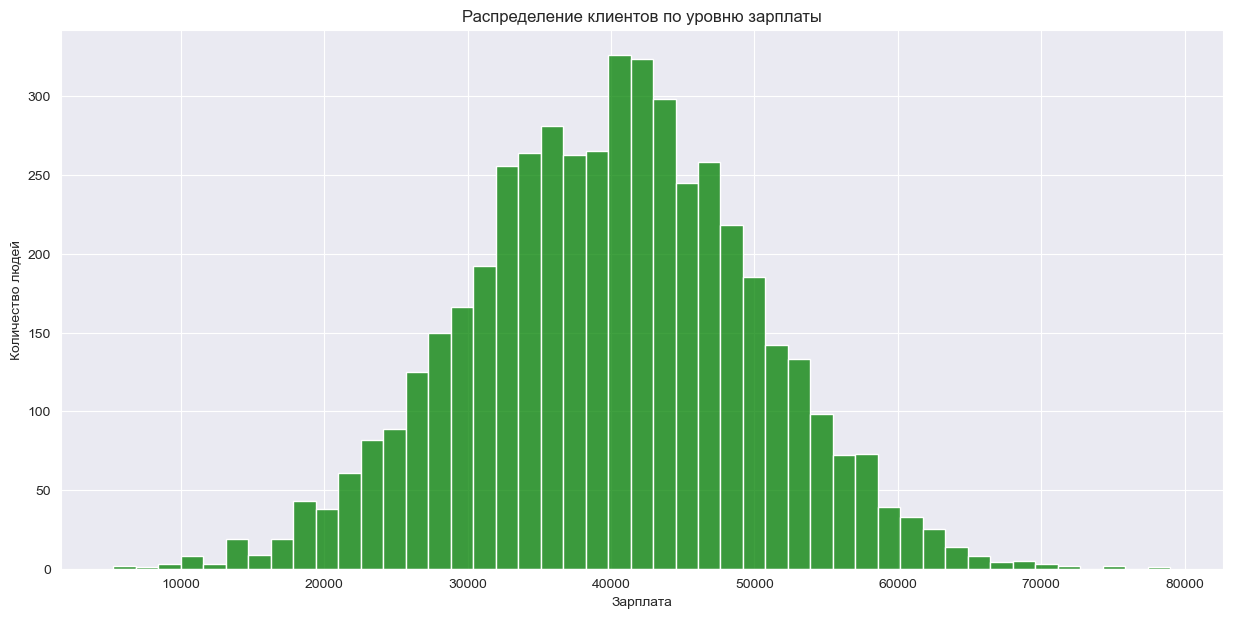

In [9]:
# строим график распределения клиентов по зарплате
ax = sns.histplot(data=data_clients.Зарплата, color='green')
ax.set(title='Распределение клиентов по уровню зарплаты', xlabel='Зарплата', ylabel='Количество людей');

Зарплаты встречаются до 80 тысяч рублей. Со средним и мелианой около 40 тысяч рублей. Распределение нормальное. Зарплат менее 10 тысяч и более 70 тысяч рублей очень мало.

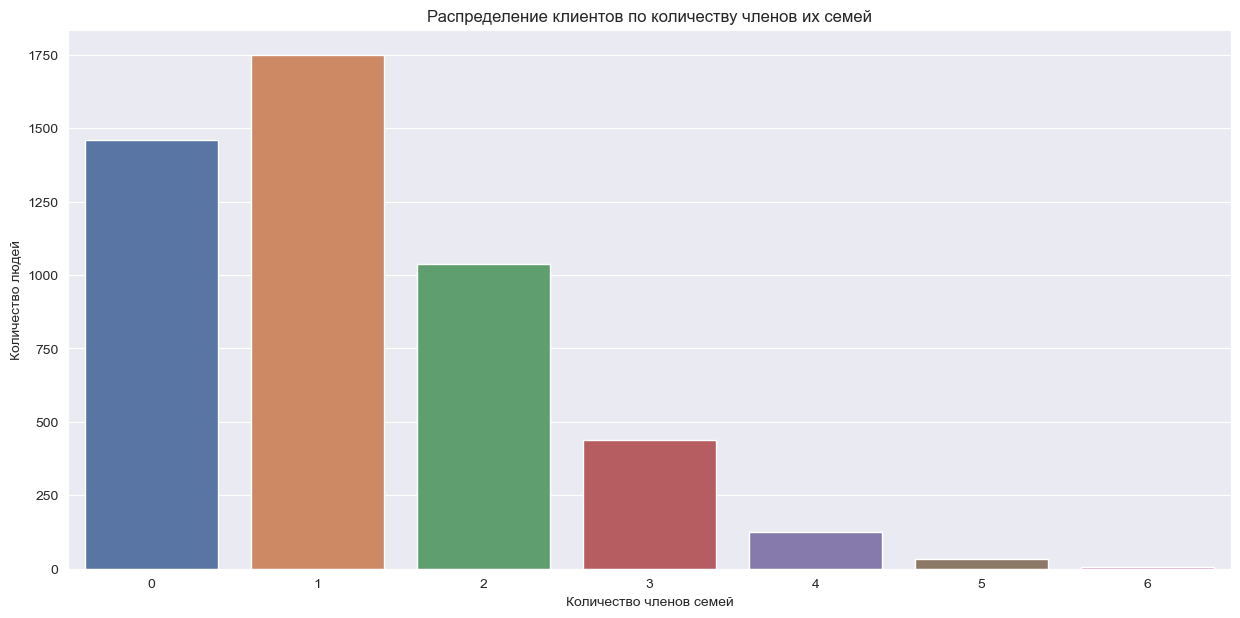

In [10]:
# строим график распределения клиентов по членам их семей
ax = sns.barplot(data=data_clients.groupby('Члены семьи', as_index=False)['Возраст'].count(), \
                 x='Члены семьи', y='Возраст', errorbar=None)
ax.set(title='Распределение клиентов по количеству членов их семей', \
       xlabel='Количество членов семей', ylabel='Количество людей');

Наиболее частые клиенты - бездетные (замужем/женатые или нет). Чем больше детей - тем меньше таких клиентов. Многодетных - мало.

In [11]:
# Что у нас с классами для предсказаний? Какой баланс?
data_clients.groupby('Страховые выплаты')['Страховые выплаты'].count()

Страховые выплаты
0    4284
1     423
2     114
3      18
4       7
5       1
Name: Страховые выплаты, dtype: int64

А вот и сюрприз! Страховые выплаты здесь не означают была выплата или же нет. А означают скорее всего количество этих самых выплат. Разумееется, в этом случае они уменьшаются весьма значительно (экпоненциально!?). Максимум - 5 выплат. Но намного чаще - ни одной.

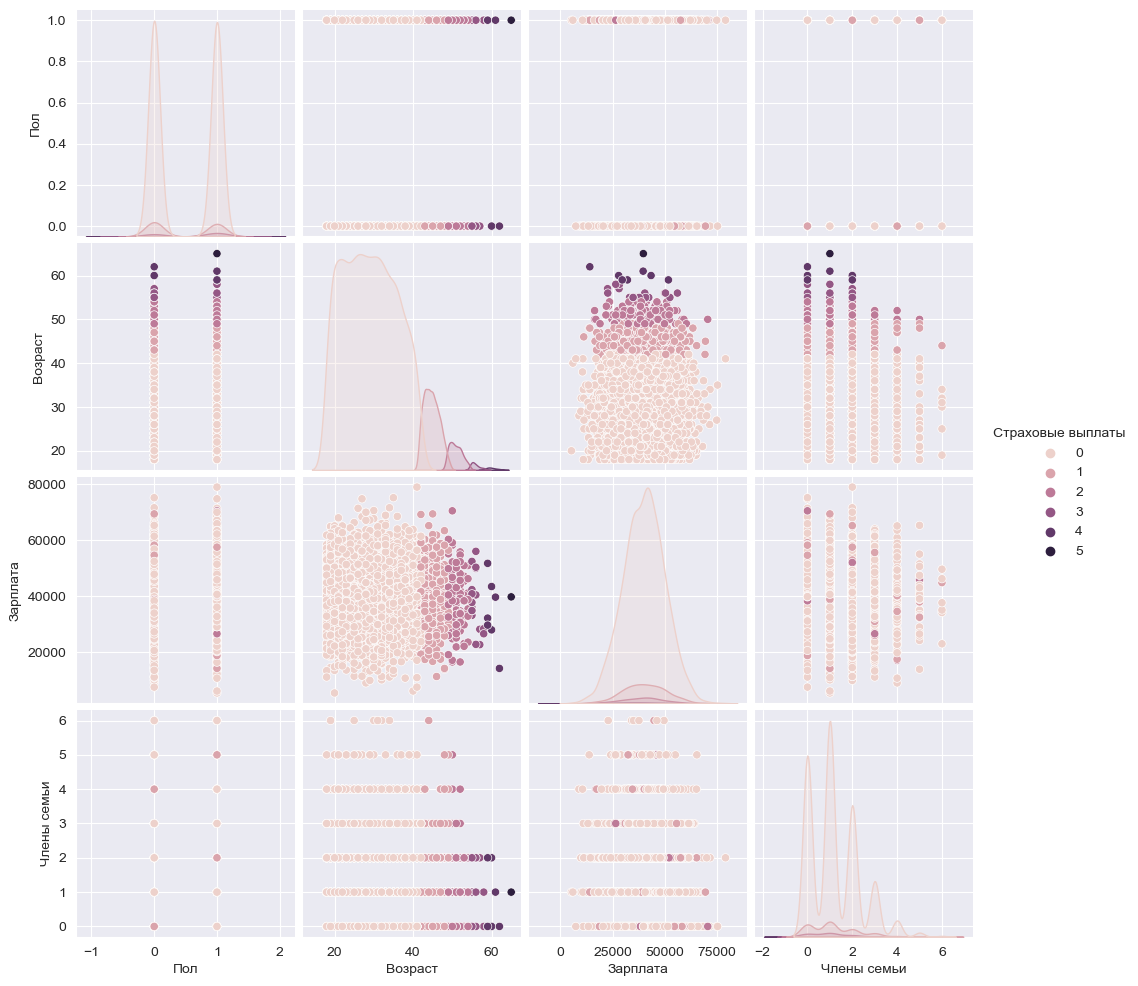

In [12]:
# смотрим как респределены данные относительно параметра для предсказаний.
sns.pairplot(data=data_clients, hue='Страховые выплаты');

Можно посмотреть чёткую зависимость наших признаков на целевую переменную, но пока что можно предположить прямую зависимость между возрастом и количеством страховых выплат. Особенно если возраст более 40 лет. Проверим влияние признаков друг на друга и на целевую переменную.

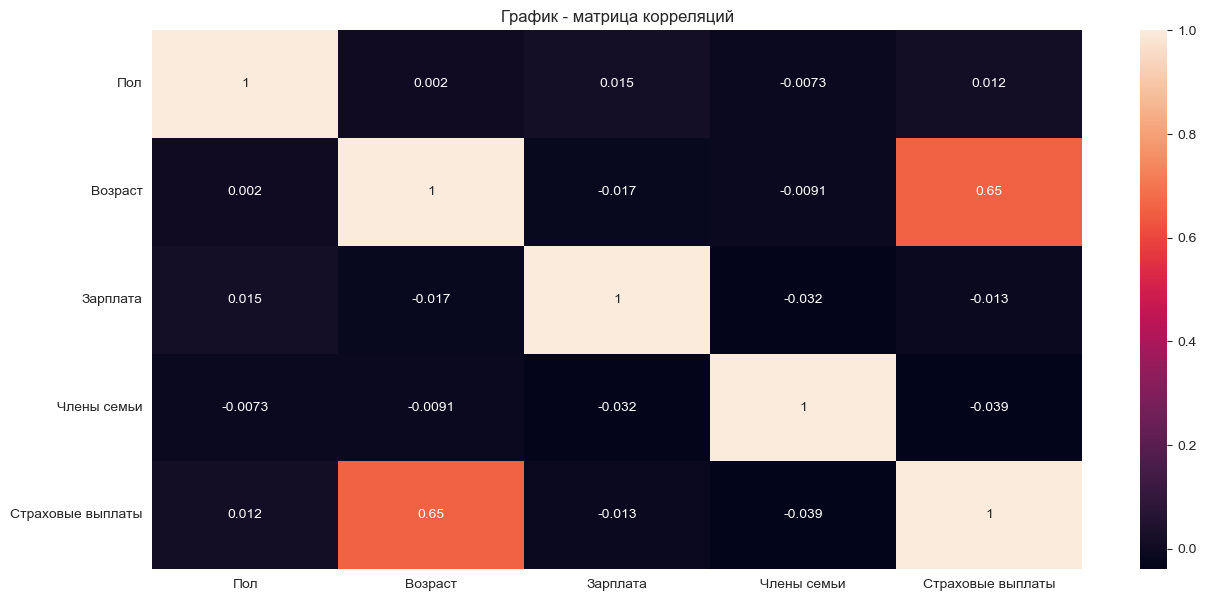

In [13]:
# строим матрацу корреляций для всех признаков
ax = sns.heatmap(data=data_clients.corr(), annot=True, cmap='rocket')
ax.set(title='График - матрица корреляций');

Да, действительно есть связь между возрастом и количеством страховых выплат. И она достаточно сильная. А вот все остальные признаки почти не влияют ни на другие признаки ни на целевую переменную.

In [14]:
# делим выборку на обучающую и тестовую, 3:1
data_clients_train, data_clients_test = train_test_split(data_clients, test_size=0.25, random_state=123)

# отделяем признаки от целевой переменной
features_train = data_clients_train.drop('Страховые выплаты', axis=1)
target_train = data_clients_train['Страховые выплаты']
features_test = data_clients_test.drop('Страховые выплаты', axis=1)
target_test = data_clients_test['Страховые выплаты']

# проверяем размеры для проверки успешности разделения
print(features_train.shape)
print(target_train.shape)
print(features_test.shape)
print(target_test.shape)

(3635, 4)
(3635,)
(1212, 4)
(1212,)


Итак, исходя из исследования наших данных можно сделать вывод о нашем наиболее часто встречающемся клиенте - это может быть мужчина или женщина (с равной вероятностью), с наибольшей вероятноностью одинокий или женатый/замужем, но без детей. Средняя ожидаемая зарплата - около 40 тысяч. Ожидаемый возраст клиента - от 19 до 47 лет. В качестве главного фактора риска для наступления страховых случаев можно выделить возраст клиента - при возрасте от 40 дет сильно возрастает вероятность страхового случая. Вот эти данные нам и предстоит зашифровать

Можно сделать вывод, что данные исследованы и разделены на признаки и целевую переменную. Можно продолжать.

## Умножение матриц

В этом задании вы можете записывать формулы в *Jupyter Notebook.*

Чтобы записать формулу внутри текста, окружите её символами доллара \\$; если снаружи —  двойными символами \\$\\$. Эти формулы записываются на языке вёрстки *LaTeX.* 

Для примера мы записали формулы линейной регрессии. Можете их скопировать и отредактировать, чтобы решить задачу.

Работать в *LaTeX* необязательно.

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

**Ответ:** При умножении на обратимую матрицу качество линейной регрессии не измениться.

**Обоснование:** Пусть у нас будет произвольная обратимая матрица P. Пусть a1 - начальная матрица весов, а a2 - будет достигнуто умножением матрицы весов на произвольную обратимую матрицу. Тогда:

$$
a1 = X (X^T X)^{-1} X^T y
$$
$$
a2 = X P ((X P)^T (X P))^{-1} (X P)^T y
$$
$$
a2 = X P (P^T X^T X P)^{-1} P^T X^T y
$$
$$
a2 = X P P^{-1} (P^T)^{-1} (X^T X)^{-1} P^T X^T y
$$
$$
a2 = X (X^T X)^{-1} X^T y
$$
$$
a1 = a2
$$

Раз после преобразования мы получаем тоже самое, что и изначальном примере можно сделать вывод, что как бы мы не изменили наши признаки таким умножением матрицы весов - итог не измениться. Во всяком случае, при таких формулах обучения

## Алгоритм преобразования

**Алгоритм**

1. Отберём по 4 случайных значения из каждого из столбцов
2. С каждым отобранным Сделаем такое преобразование - сначала умножим значение на 10, затем возьмём корень квадратный из этого числа
3. Затем объединим в матрицу все значения
4. Проверим матрицу на обратимость
5. Домножим наши признаки на получившиеся матрицу

**Обоснование**

Как уже доказывалось выше мы можем почти как угодно менять наши данные, чтобы не изменить ответ. Нет такой обратимой матрицы, которая бы нас не устроила. А вот какие значения могут возникнуть - это нас не интересует, но вот понять что было в начале будет очень сложно.

## Проверка алгоритма

In [15]:
# сделаем функцию для преобразования наших значений
def random_transform(values):
    matrix = []
    for column in values.columns:
        lst_num = np.array(values[column].sample(n=4))
        lst_num = np.sqrt(lst_num * 10)
        matrix.append(lst_num)
    try:
        inverse_matrix = np.linalg.inv(np.array(matrix))
        return (matrix, True)
    except:
        return (matrix, False)    

In [16]:
# преобразуем признаки
add_matrix = ([], False)
while add_matrix[1] == False:
    add_matrix = random_transform(features_train)
add_matrix = np.array(add_matrix[0])

features_transform_train = features_train.values.dot(add_matrix)
features_transform_test = features_test.values.dot(add_matrix)
# а что получилось?
print(features_transform_train)
print(features_transform_test)

[[20427098.57330071 20073406.16604576 13146433.07181459 20889276.48104379]
 [15337167.34656008 15071561.44125461  9870739.40123997 15684154.89237491]
 [22873107.7017787  22477059.59686438 14720648.04156016 23390628.26045787]
 ...
 [22344541.60665526 21957590.29801523 14380525.82884588 22850061.09725769]
 [31863573.19351418 31311861.80901068 20506678.32130494 32584507.09650185]
 [19105401.62642232 18774518.94543878 12295910.68225265 19537622.48969769]]
[[30475242.06660578 29947582.79216162 19613164.4988576  31164773.07179179]
 [28822610.28531881 28323559.10664719 18549574.13302169 29474744.81819173]
 [28360079.73845207 27869006.78577457 18251951.93076175 29001731.36373091]
 ...
 [26310706.463119   25855131.46168175 16933013.63619994 26906001.18951572]
 [22674736.95475566 22282127.06937125 14592965.78785445 23187769.08431194]
 [17386294.12645709 17085242.8303449  11189474.31956125 17779670.2778243 ]]


Данных не узнать никак! И что же было изначально? Не зная - не увидишь...

In [17]:
# обучаем линейную регрессию на наших признаках
model_after = LinearRegression()
model_after.fit(features_transform_train, target_train)
pred_y_after = model_after.predict(features_transform_test)
print(r2_score(target_test, pred_y_after))

0.4097895814672722


Предсказания есть! Осталось сравнить с исходными данными на такой модели.

In [18]:
# обучаем линейную регрессию на изначальных признаках
model_before = LinearRegression()
model_before.fit(features_train, target_train)
pred_y_before = model_before.predict(features_test)
print(r2_score(target_test, pred_y_before))

0.4097895814653255


Ошибочка небольшая есть, но она меньше чем $10^{-9}$. Это погрешность и ничего более. Задача выполнена - так можно преобразовать до неузнаваемости любые данные.

## Общий вывод

Нам удалось доказать, что можно изменить до неузнаваемости любые исходные данные, если умножить их на любую обратимую матрицу и использовать их для получения новых предсказаний, качеством не хуже, чем на  изначальных данных.